<a href="https://colab.research.google.com/github/Edimosphy/Lens_of_Truth/blob/main/3mmt_Capstone_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3MTT CAPSTONE PROJECT 2**

**Through the Lens of Truth: Analyzing and Detecting Fake News**

##**BRIEF INFORMATION ABOUT THE ORGANISATION**

![TruthLens](https://drive.google.com/uc?export=view&id=1BSdTj6PVZwEnSCqucDa5DVHUGcPV_6jK)


**Summary of The TruthLens Institute**

The TruthLens Institute, founded in 2015, is a global research organization dedicated to combating misinformation and promoting digital literacy. Formed by data scientists, journalists, and social researchers, it leverages advanced technology and interdisciplinary methods to address fake news, bias, and disinformation.

**Mission:**
To equip individuals and organizations with tools and strategies to detect and reduce the spread of false or misleading information.

**Key Focus Areas:**
- Data-Driven Research: Analyzing large datasets to uncover patterns in misinformation.
- Technology Development: Creating AI tools to detect fake news in real time.
- Public Education: Delivering educational content to boost critical thinking and digital literacy.
- Policy Advocacy: Working with stakeholders to promote ethical content moderation policies.

**Impact:**
TruthLens has collaborated with global institutions like the UN, shaping public debate and influencing policies on media integrity.

**Why “TruthLens”?**
The name signifies a clear, unbiased lens to view information, helping rebuild trust in the media landscape by separating truth from noise.

##**STEP 1: PROJECT SUMMARY, OBJECTIVES, PROBLEM AND GOALS**




**Project Objectives**
- Explore the Dataset: Gain a thorough understanding of the structure, distribution, and properties of the news data and metadata.
- Clean the Data: Address missing values, inconsistent labels, and noisy or irrelevant text fields.
- Engineer Features: Extract relevant insights from both the text (e.g., word count, sentiment) and metadata (e.g., domains, timestamps).
- Develop Predictive Models: Use NLP and machine learning techniques to classify content as fake or real/bias-based.
- Provide Recommendations: Summarize findings, discuss model limitations, and suggest ways to enhance misinformation detection systems.

**Problem Statement**
Misinformation spreads rapidly online, influencing public opinion, trust in media, and societal behavior. There’s a critical need to:
- Identify false or biased content efficiently.
- Understand the characteristics that differentiate fake from real news.
- Build automated systems that assist in real-time detection across digital platforms.

**Project Goals**
- Build a machine learning pipeline that can accurately detect fake or biased news using both text and metadata.
- Extract actionable insights on misinformation trends—e.g., which websites, keywords, or time periods are most associated with fake content.
- Develop visualizations and tools that can aid analysts and policy advocates in understanding misinformation patterns.
- Propose ethical and practical recommendations for improving data collection, labeling, and deployment of detection models.

##**STEP 2: Data Exploration and Cleaning**

In [ ]:
#Import the librabries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

Before loading the dataset, the goggle drive will be linked to have access to the dataset

In [ ]:
#import data
df= pd.read_csv("/content/drive/MyDrive/3MTT/Assignment, Miniproject/fake_or_real_news.csv")
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [ ]:
#Shape
df.shape
print("There is a total of {} rows and {} columns in this dataset".format(df.shape[0], df.shape[1]))

There is a total of 6335 rows and 4 columns in this dataset


In [ ]:
#Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [ ]:
#Checking for missing values
df.isnull().sum()


,0
Unnamed: 0,0
title,0
text,0
label,0


####**Dropping of Column**
Since the column Unnamed is not useful for this analysis, it will be dropped

In [ ]:
#Removing unnecessary column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
#Check if it has been removed
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
#Check the value count in label
df['label'].value_counts()

,count
label,
REAL,3171
FAKE,3164


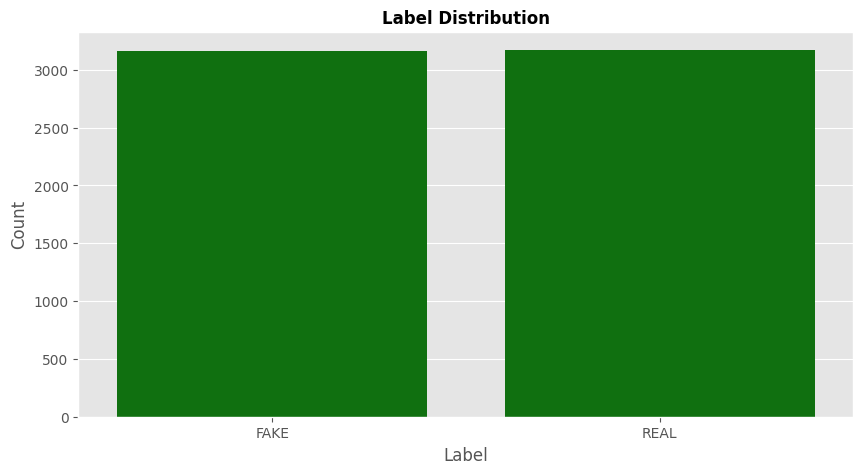

In [ ]:
#Plot the graph
plt.figure(figsize=(10,5))
sns.countplot(x="label", data= df, color="green")
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution', fontsize = 12, fontweight= "bold")
plt.show()


**Pattern**
- Real has a total of 3171 value count
- Fake news has a total of 3164 value count

**Insight**
- Fake news is closely as populated as real news as this may lead to misinformation as fake news may be identifies as real news if not properly checked and confirmed.


####**Handling Inconsistencies in dataset**

In [ ]:
#Make the label in lower case
df["label"] = df["label"].str.lower()

df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",fake
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,fake
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,real
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",fake
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,real
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,real
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,fake
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,fake
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",real


In [ ]:
#Join text and title into one
#Combining the title and text column
df['content'] = df['title'] + ":" + " " + df['text']
df = df[['content', 'label']]

#View the head
df.head()

,content,label
0,You Can Smell Hillary’s Fear: Daniel Greenfiel...,fake
1,Watch The Exact Moment Paul Ryan Committed Pol...,fake
2,Kerry to go to Paris in gesture of sympathy: U...,real
3,Bernie supporters on Twitter erupt in anger ag...,fake
4,The Battle of New York: Why This Primary Matte...,real


####**Preprocess the text data**

In [ ]:
#!pip install wordcloud

In [ ]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
stop_words = set(stopwords.words('english'))

##using the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Create a function to clean the dataset

# remove stopwords, punctuations, and perform tokenization

def clean_text(text):
    # Check if the input is a string
    if not isinstance(text, str):
        return "" # Return an empty string for non-string inputs

    # removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", text)

    # change sentence to lower case
    sentence = sentence.lower()

    # Remove punctuation
    sentence = "".join([char for char in sentence if char not in string.punctuation])

    # tokenize into words
    tokens = sentence.split()

    # removing stop words and lemmatizing
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(clean_tokens)

In [ ]:
#Applying the cleaning
df['content'] = df['content'].apply(clean_text)

In [ ]:
df.head()

,content,label
0,smell hillary fear daniel greenfield shillman ...,fake
1,watch exact moment paul ryan committed politic...,fake
2,kerry go paris gesture sympathy u secretary st...,real
3,bernie supporter twitter erupt anger dnc tried...,fake
4,battle new york primary matter primary day new...,real


In [ ]:
#check for duplicates
df.duplicated().sum()
print("There are {} duplicate values in this dataset".format(df.duplicated().sum()))

There are 32 duplicate values in this dataset


In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6303 entries, 0 to 6334
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  6303 non-null   object
 1   label    6303 non-null   object
dtypes: object(2)
memory usage: 147.7+ KB


In [ ]:
#Check missing values
df.isnull().sum()


,0
content,0
label,0


##**STEP 3: Feature Engineering**

####**Visualization**
To reconfirm the value count of the label after cleaning

In [ ]:
#Check the new value count

df['label'].value_counts()

,count
label,
real,3153
fake,3150


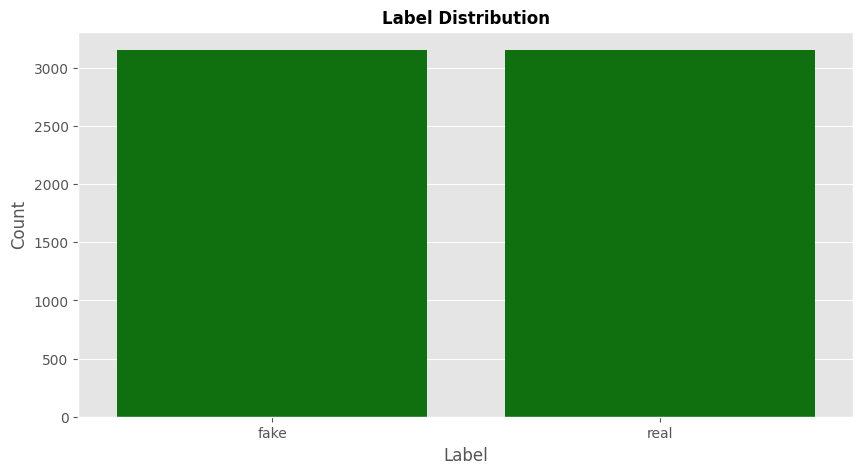

In [ ]:
#Plot a graph
plt.figure(figsize=(10,5))
sns.countplot(x="label", data= df, color="green")
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution', fontsize = 12, fontweight= "bold")
plt.show()

***Pattern**
- Real has a total of 3153 value count
- Fake news has a total of 3150 value count


**Insight**
- Fake news is closely as populated as real news as this may lead to misinformation as fake news may be identifies as real news if not properly checked and confirmed.

###**Extract Key Features**

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
#Extract key features
#nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df['word_count'] = df['content'].str.split().str.len()
df['sentiment']  = df['content'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [ ]:
df.head()

,content,label,word_count,sentiment
0,smell hillary fear daniel greenfield shillman ...,fake,673,-0.9992
1,watch exact moment paul ryan committed politic...,fake,251,0.7968
2,kerry go paris gesture sympathy u secretary st...,real,246,0.8555
3,bernie supporter twitter erupt anger dnc tried...,fake,251,-0.4829
4,battle new york primary matter primary day new...,real,183,0.9738


**Pattern**
- Extract of word count and sentiment was done
- Both fake and real news has both negative and positive values

**Insight**
- Due to both fake news and real news having both the same characters in word count and sentiment, this might to misinformation as there is no much unique character between

**Recommendation**
- The use of meta-data such as url domain and other feature engineer should be done to establish the uniqueness for fake news and real news to avoid misinformation or wrong flagging of news.

In [ ]:
#generate a word cloud for frequently occurring terms in fake news articles and real news articles
from wordcloud import WordCloud, STOPWORDS

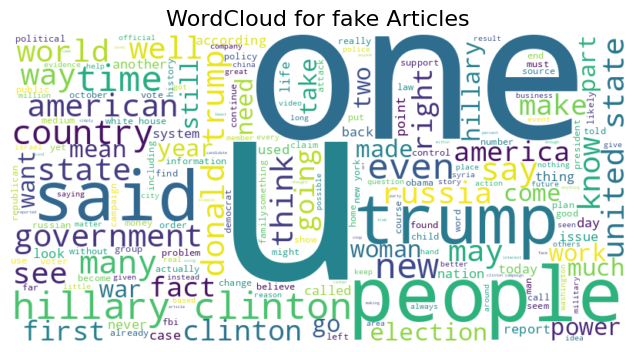

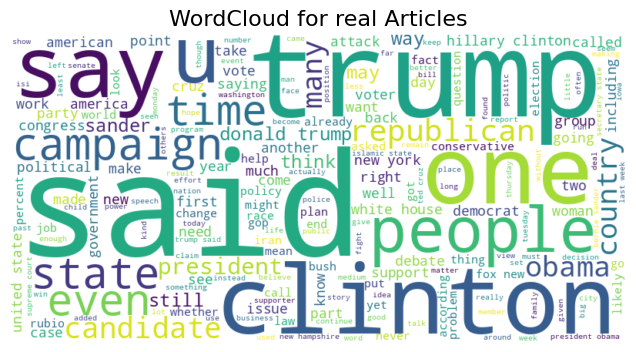

In [ ]:
stopwords = set(STOPWORDS)

for label in df['label'].unique():
    plt.figure(figsize=(10, 4))
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=stopwords,
        max_words=200
    ).generate(' '.join(df[df['label'] == label]['content']))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {label} Articles", fontsize=16)
    plt.show()

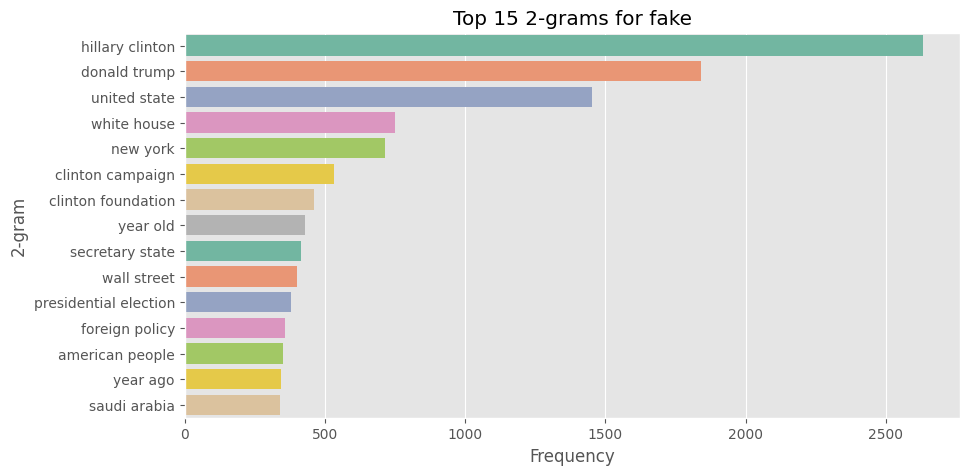

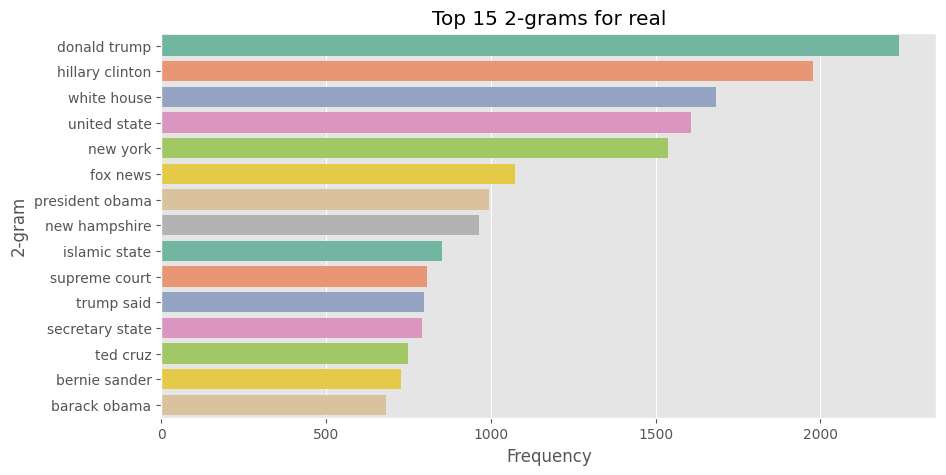

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def plot_top_ngrams(texts, n=2, label='FAKE', top_n=15):
    vec = CountVectorizer(ngram_range=(n, n), stop_words='english').fit(texts)
    bag_of_words = vec.transform(texts)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:top_n]
    x, y = zip(*words_freq)
    plt.figure(figsize=(10,5))
    sns.barplot(x=y, y=x, palette='Set2')
    plt.title(f'Top {top_n} {n}-grams for {label}')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-gram')
    plt.show()

# Plot for each label
for label in df['label'].unique():
    plot_top_ngrams(df[df['label']==label]['content'], n=2, label=label)

#####**Insights from Text Visualization (WordClouds and Top 2-grams)**

Text visualizations, specifically WordClouds and Top 2-gram plots, were used to explore the most frequent terms and phrases in both fake and real news articles within the dataset. This analysis helps to understand the linguistic patterns and topical differences between the two categories of news.

**WordCloud Analysis:**

- **Common Words:** As observed, both fake and real news articles frequently feature prominent political names and general terms such as "trump", "clinton", "people", "said", "state", and "campaign". This highlights the strong political focus of the articles in this dataset, regardless of their authenticity.
Notable Differences:
- **Fake News:** WordClouds for fake news articles tend to display words related to broader concepts or dramatic themes like "government", "world", "power", and "problem". Specific names like "russia" and "hillary clinton" also appear prominently, suggesting a potential focus on particular narratives or controversies.
- **Real News:** WordClouds for real news articles show a higher frequency of more formal and institutional terms such as "president", "campaign", "vote", "congress", and "obama". This reflects a more conventional and broader coverage of political events and figures.


**Top 2-gram (Bigram) Analysis:**

- **FAKE News Top Bigrams:** The most frequent bigrams in fake news include "hillary clinton", "donald trump", "united state", and "white house". Unique bigrams like "clinton campaign", "clinton foundation", "american people", and "year ago" suggest a focus on specific individuals, organizations, and potentially a narrative style that emphasizes certain events or groups. The presence of terms like "american people" could indicate an attempt to directly address or appeal to the audience.
- **REAL News Top Bigrams:** Real news also features "donald trump", "hillary clinton", "white house", and "united state" among its top bigrams, indicating shared subject matter. However, unique bigrams such as "fox news", "president obama", "islamic state", "supreme court", "bernie sander", and "barack obama" point to a wider range of covered entities, including news organizations, official titles, and global events, consistent with broader news reporting.

**Overlap and Distinction:**

- **Overlap:** The significant overlap in frequently mentioned political figures (like "donald trump" and "hillary clinton") underscores that both fake and real news in this dataset are centered around similar political themes and individuals.
- **Distinction:** The key distinction lies in the unique phrases and the diversity of the bigrams. Fake news appears to concentrate on a narrower set of potentially controversial or repeatedly emphasized narratives, often involving specific individuals and their associated entities. Real news, in contrast, covers a more diverse array of official bodies, global issues, and media sources, reflecting a broader and more varied news landscape.

**Conclusion:** The text visualizations provide valuable insights into the linguistic characteristics of fake and real news in the dataset. While sharing common political subjects, fake news tends to employ more dramatic or narrative-focused language and concentrate on specific, potentially controversial themes. Real news, on the other hand, uses more formal language and covers a wider range of institutional and global topics. These linguistic differences are crucial for understanding how misinformation might be structured and for developing models to detect it.

###**Extract metadata-based features**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF‑IDF matrix (useful for ML later)
tfidf = TfidfVectorizer(max_features=20_000, ngram_range=(1,2))
X_tfidf = tfidf.fit_transform(df['content'])

print("TF-IDF matrix created.")
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix created.
TF-IDF matrix shape: (6303, 20000)


In [ ]:
# Check Domain from URL
from urllib.parse import urlparse

if 'url' in df.columns:
    df['domain'] = df['url'].apply(lambda u: urlparse(str(u)).netloc.replace('www.','') if pd.notna(u) else 'unknown')
    print("'domain' column created successfully.")
else:
    print("The 'url' column was not found in the DataFrame")

The 'url' column was not found in the DataFrame


In [ ]:
if 'timestamp' in df.columns:
    df['publish_hour'] = pd.to_datetime(df['timestamp'], errors='coerce').dt.hour
    print("'publish_hour' column created successfully.")
else:
    print("The 'timestamp' column was not found in the DataFrame." )

The 'timestamp' column was not found in the DataFrame.


**Pattern**
- There is no record of url domain and timestamp found in the dataset

**Insight**
- The Absence of url domain and timestamp in this dataset might reduce the uniqueness of identifyng fake news and real news thus leading to false positive and true negative results.

**Recommendation**
- Further feature engineer and meta- data should be done to explore more features for model training and better significant differences of fake news and real news.

In [ ]:
#Check the dataset
df.head(10)

,content,label,word_count,sentiment
0,smell hillary fear daniel greenfield shillman ...,fake,673,-0.9992
1,watch exact moment paul ryan committed politic...,fake,251,0.7968
2,kerry go paris gesture sympathy u secretary st...,real,246,0.8555
3,bernie supporter twitter erupt anger dnc tried...,fake,251,-0.4829
4,battle new york primary matter primary day new...,real,183,0.9738
5,tehran usa immigrant grandparent year ago arri...,fake,1157,-0.9962
6,girl horrified watch boyfriend left facetime s...,fake,280,-0.9744
7,britain schindler dy czech stockbroker saved j...,real,73,-0.7717
8,fact check trump clinton commander chief forum...,real,1317,-0.8801
9,iran reportedly make new push uranium concessi...,real,433,0.8617


In [ ]:
# Convert non-TFIDF features to matrix form
other_features = df[['word_count',  'sentiment']].values


In [ ]:
#check the shape
other_features.shape

(6303, 2)

##**STEP 3: Model Development**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Importing Evaluation Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    classification_report
)

In [ ]:
import scipy.sparse
from sklearn.preprocessing import LabelEncoder

# Combine with TF-IDF matrix
X = scipy.sparse.hstack([X_tfidf, other_features])

le= LabelEncoder()
y= le.fit_transform(df['label'])

**Insight**
- The word count and sentiment is added to the X_tfidf to have more features for more better model training

**Splitting Train and Test SET**

In [ ]:
#Using stratify for balance distribution
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5672, 20002)
y_train shape: (5672,)
X_test shape: (631, 20002)
y_test shape: (631,)


####**1. Logistics Regression**

**Model Training**

In [ ]:
log_re= LogisticRegression(max_iter= 2000, random_state= 42)
log_re.fit(X_train, y_train)

LogisticRegression(max_iter=2000, random_state=42)

In [ ]:
#Predict the result
y_pred= log_re.predict(X_test)

In [ ]:
print(y_pred)

[1 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0
 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1
 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 0 0 0 0 0 

**Model Evaluation**

In [ ]:
#Print the evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.919175911251981
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       315
           1       0.95      0.89      0.92       316

    accuracy                           0.92       631
   macro avg       0.92      0.92      0.92       631
weighted avg       0.92      0.92      0.92       631



Text(0.5, 1.0, 'Confusion Matrix')

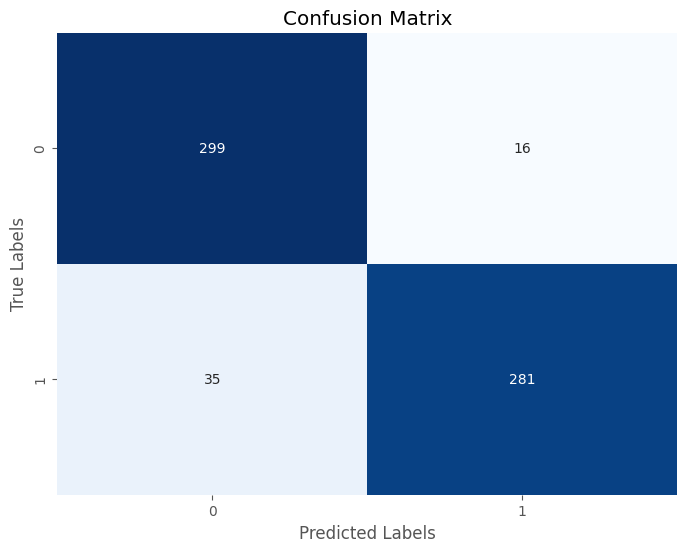

In [ ]:
#Plot a confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [ ]:
# Create a DataFrame to display actual and predicted results
# Only include the decoded 'Actual' and 'LR Predictions' columns
results = pd.DataFrame({"Actual": le.inverse_transform(y_test)})
results= results.join(pd.DataFrame({"LR Predictions": le.inverse_transform(y_pred)}))

# Display the results
results



,Actual,LR Predictions
0,real,real
1,fake,fake
2,fake,fake
3,fake,fake
4,real,real
...,...,...
626,fake,fake
627,fake,fake
628,fake,fake
629,fake,fake


**Logstics Regression**

**Pattern**
- Logistic regression model has 91% accuracy
- For the fake new articles: precision is 90%, recall= 95%, f1-score= 92%
- For the Real new articles: precision is 0.95, recall= 89% and f1-score = 92%

**Insight**
- The model seems to be performing well as it has high percentages and address class imbalance.


###**2. SVC**

**Model Training**

In [ ]:
svc= SVC(random_state= 42)
svc.fit(X_train, y_train)

SVC(random_state=42)

In [ ]:
#Prediction
Svc_y_pred= svc.predict(X_test)

print(Svc_y_pred)

[0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1
 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1
 1 1 1 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1
 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1
 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 0 1 0 

**Model Evaluation**

In [ ]:
print("Accuracy:", accuracy_score(y_test, Svc_y_pred))
print(classification_report(y_test, Svc_y_pred))

Accuracy: 0.6275752773375595
              precision    recall  f1-score   support

           0       0.62      0.65      0.64       315
           1       0.63      0.60      0.62       316

    accuracy                           0.63       631
   macro avg       0.63      0.63      0.63       631
weighted avg       0.63      0.63      0.63       631



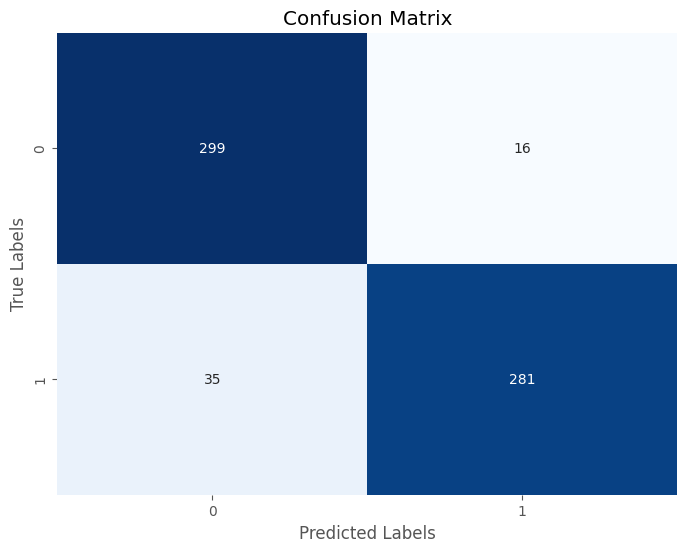

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Assuming results DataFrame with 'Actual' and 'LR Predictions' exists
# Assuming Svc_y_pred (SVC predictions) and le (LabelEncoder) are available

# Add SVC predictions as a new column to the existing results DataFrame
results['SVC Predictions'] = le.inverse_transform(Svc_y_pred)

# Display the results with LR and SVC predictions
results

,Actual,LR Predictions,SVC Predictions
0,real,real,fake
1,fake,fake,real
2,fake,fake,fake
3,fake,fake,fake
4,real,real,fake
...,...,...,...
626,fake,fake,real
627,fake,fake,fake
628,fake,fake,real
629,fake,fake,fake


**SVC**

**Pattern**
- This model has 62.75% accuracy score
- For the fake news: It has 62% percision, 65% recall and 64% f1-score
- For the real news: It has 63% percision, 60% recall and 62% f1- score

**Insight**
- The model is not getting enough details to learn and train on.
- This could be as a result of lacking features to rely on for its training.

**Recommendation**
- Features engineering should be explored to extract more features to yield more better results.
- Further tuning can be explored, this could potentially yield better results.

###**3. Decision Tree Classifier**

**Model Training**

In [ ]:
dec_tree= DecisionTreeClassifier(random_state= 42)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
#Prediction
dec_tree_y_pred= dec_tree.predict(X_test)

print(dec_tree_y_pred)

[1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1
 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1
 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1
 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1
 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 0 0 0 1 1 

**Model Evaluation**

In [ ]:
print("Accuracy:", accuracy_score(y_test, dec_tree_y_pred))
print(classification_report(y_test, dec_tree_y_pred))

Accuracy: 0.8351822503961965
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       315
           1       0.83      0.85      0.84       316

    accuracy                           0.84       631
   macro avg       0.84      0.84      0.84       631
weighted avg       0.84      0.84      0.84       631



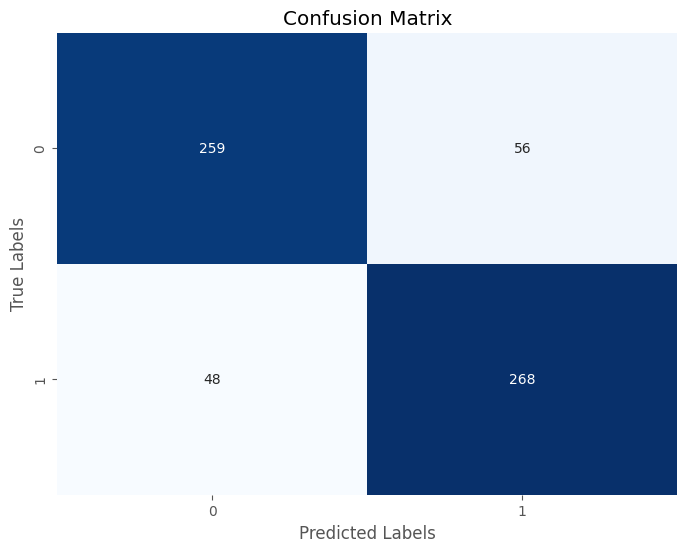

In [ ]:
#Create a confusion matrix
cm = confusion_matrix(y_test, dec_tree_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Check the prediction
results= results.join(pd.DataFrame({"Decision Tree Predictions": le.inverse_transform(dec_tree_y_pred)}))

results

,Actual,LR Predictions,SVC Predictions,Decision Tree Predictions
0,real,real,fake,real
1,fake,fake,real,fake
2,fake,fake,fake,fake
3,fake,fake,fake,fake
4,real,real,fake,real
...,...,...,...,...
626,fake,fake,real,fake
627,fake,fake,fake,fake
628,fake,fake,real,fake
629,fake,fake,fake,fake


**Decision Tree**

**Pattern**
- The model has accuracy score of 83%
- For the fake news: It achieved percision of 0.84, recall of 0.82 and f1-score of 0.83.
- For the real news: It achieved percision of 0.83 which is close to fake new, slight increase in recall of  0.85 and f1-score of 0.84.

**Insight**
- This model performed well in training the dataset.
- It performs more than SVC but still needs rooms to improve better.

**Recommendation**
- Further hyperparameters tuning can be explored to yield better results


###**4. Random Forest Classifierr**

**Model Training**

In [ ]:
rand= RandomForestClassifier(random_state= 42)
rand.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#Prediction
rand_y_pred= rand.predict(X_test)

print(rand_y_pred)

[1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 0 0
 1 1 0 1 0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1
 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1
 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 0 1
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 

**Model Evaluation**


In [ ]:
print("Accuracy:", accuracy_score(y_test, rand_y_pred))
print(classification_report(y_test, rand_y_pred))

Accuracy: 0.8985736925515055
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       315
           1       0.90      0.89      0.90       316

    accuracy                           0.90       631
   macro avg       0.90      0.90      0.90       631
weighted avg       0.90      0.90      0.90       631



Text(0.5, 1.0, 'Confusion Matrix')

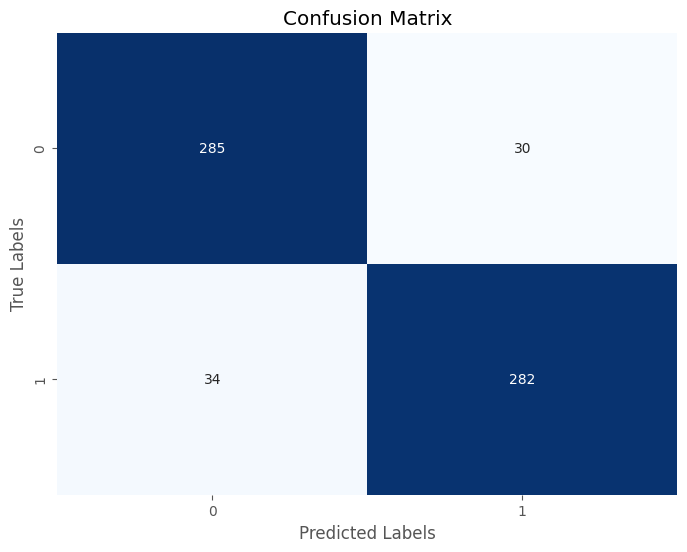

In [ ]:
#Create a confusion matrix
cm = confusion_matrix(y_test, rand_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

In [ ]:
#Compare the prediction
results= results.join(pd.DataFrame({"Random Forest Predictions": le.inverse_transform(rand_y_pred)}))

results

,Actual,LR Predictions,SVC Predictions,Decision Tree Predictions,Random Forest Predictions
0,real,real,fake,real,real
1,fake,fake,real,fake,real
2,fake,fake,fake,fake,fake
3,fake,fake,fake,fake,fake
4,real,real,fake,real,real
...,...,...,...,...,...
626,fake,fake,real,fake,fake
627,fake,fake,fake,fake,fake
628,fake,fake,real,fake,fake
629,fake,fake,fake,fake,fake


**Random Forest Classifier**

**Pattern**
- This model has an acccuracy score of 0.8985
- For the fake news: It has percision of 0.89, recall of 0.90 and f1-score of 0.90.
- For the real news: It has percision of 0.90, recall of 0.89 and f1-score of 0.90.

**Insight**
- This model shows high sense of identifyng both the fake and real new articles in the similar ratio.
- It slightly performed well more than Decision tree and SVC but slightly to Logistics Regression.

**Recommendation**
- Further hyperparameter tuning can be explored to potentially improved the result


###**5. XGB Classifer**

**Model Training**

In [ ]:
xgb_class= XGBClassifier(random_state= 42)
xgb_class.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Prediction
xgb_y_pred= xgb_class.predict(X_test)

print(xgb_y_pred)

[1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 0 0 0 1 0 

**Model Evaluation**

In [ ]:
print("Accuracy:", accuracy_score(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))

Accuracy: 0.9334389857369255
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       315
           1       0.95      0.92      0.93       316

    accuracy                           0.93       631
   macro avg       0.93      0.93      0.93       631
weighted avg       0.93      0.93      0.93       631



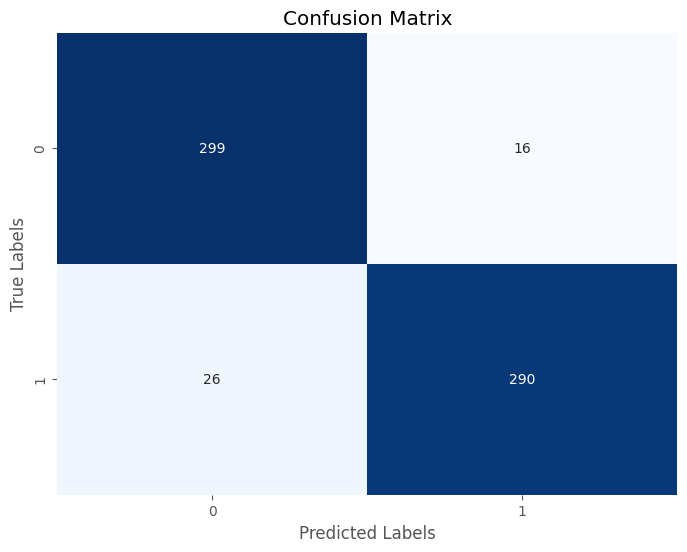

In [ ]:
#Create confusion matrix
cm = confusion_matrix(y_test, xgb_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Compare the prediction
results= results.join(pd.DataFrame({"XGB Predictions": le.inverse_transform(xgb_y_pred)}))

results


,Actual,LR Predictions,SVC Predictions,Decision Tree Predictions,Random Forest Predictions,XGB Predictions
0,real,real,fake,real,real,real
1,fake,fake,real,fake,real,fake
2,fake,fake,fake,fake,fake,fake
3,fake,fake,fake,fake,fake,fake
4,real,real,fake,real,real,fake
...,...,...,...,...,...,...
626,fake,fake,real,fake,fake,fake
627,fake,fake,fake,fake,fake,fake
628,fake,fake,real,fake,fake,fake
629,fake,fake,fake,fake,fake,fake


**XGB Classifier**

**Pattern**
- The model has an accuracy score of 93%
- For the fake new: it achieved percision of 0.92, recall of 0.95  and f1-score of 0.93.
- For the real new: it achieved percision of 0.95, recall of 0.92 and f1-score of 0.93.

**Insight**
- The XGBoost model achieved high accuracy in classifying both fake and real news articles.
- The precision and recall scores for both classes are well-balanced, indicating the model is not significantly biased towards misclassifying one class over the other.
- The F1-scores of 0.93 for both fake and real news suggest a strong overall performance, effectively balancing precision and recall.
- Compared to the other models evaluated (Logistic Regression, SVC, Decision Tree, and Random Forest), the tuned XGBoost Classifier achieved the highest accuracy and F1-scores, making it the best-performing model in this evaluation.

**Recommendation**
- Further exploration on meta- data features should be added to improved the dataset.
- Further hyperparameter tuning should be explored, this might potentially improved the result.

###**Evaluate and Compare the Model Using ROC-AUC**

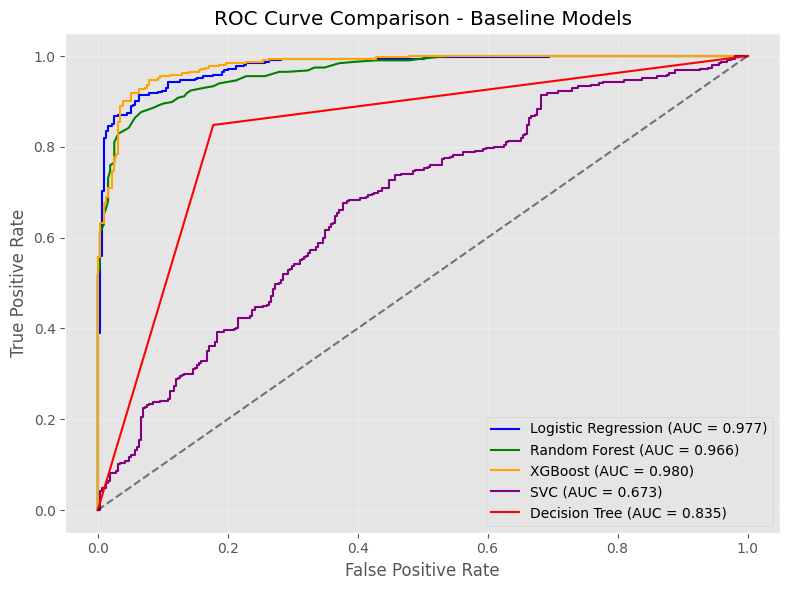

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for each model

#For logistics regression
fpr_log_re, tpr_log_re, _ = roc_curve(y_test, log_re.predict_proba(X_test)[:, 1])
auc_log_re = auc(fpr_log_re, tpr_log_re)

#For SVC
fpr_svc, tpr_svc, _ = roc_curve(y_test, svc.decision_function(X_test))
auc_svc = auc(fpr_svc, tpr_svc)

#For Decision Tree
fpr_dec_tree, tpr_dec_tree, _ = roc_curve(y_test, dec_tree.predict_proba(X_test)[:, 1])
auc_dec_tree = auc(fpr_dec_tree, tpr_dec_tree)

#For Random Forest Classifier
fpr_rand, tpr_rand, _ = roc_curve(y_test, rand.predict_proba(X_test)[:, 1])
auc_rand = auc(fpr_rand, tpr_rand)

#For XGB Classifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_class.predict_proba(X_test)[:, 1])
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Create dictionaries to store results for plotting
results_log_reg = {'name': 'Logistic Regression', 'fpr': fpr_log_re, 'tpr': tpr_log_re, 'auc': auc_log_re}
results_svm = {'name': 'SVC', 'fpr': fpr_svc, 'tpr': tpr_svc, 'auc': auc_svc}
results_dec_tree = {'name': 'Decision Tree', 'fpr': fpr_dec_tree, 'tpr': tpr_dec_tree, 'auc': auc_dec_tree}
results_rf = {'name': 'Random Forest', 'fpr': fpr_rand, 'tpr': tpr_rand, 'auc': auc_rand}
results_xgb = {'name': 'XGBoost', 'fpr': fpr_xgb, 'tpr': tpr_xgb, 'auc': auc_xgb}

# List of all result objects and their curve colors
models = [
    (results_log_reg, 'blue'),
    (results_rf, 'green'),
    (results_xgb, 'orange'),
    (results_svm, 'purple'),
    (results_dec_tree, 'red') # Added Decision Tree
]

# Create the ROC comparison plot
plt.figure(figsize=(8, 6))

# Plot each model's ROC curve
for result, color in models:
    plt.plot(result['fpr'], result['tpr'],
             label=f"{result['name']} (AUC = {result['auc']:.3f})",
             color=color)

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

# Chart details
plt.title("ROC Curve Comparison - Baseline Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**ROC-AUC INTERPRETATION OF ALL MODELS**

**Pattern**
- Logistics Regression has 0.97 roc-auc
- Random Forest has 0.96 roc-auc
- XGBoost has 0.98 roc-auc
- SVC has 0.67  roc-auc
- Decision Tree has 0.83


**Insight**

Based on the analyis:
- The XGBoost model has the highest ROC-AUC score (0.98), indicating it is the best performing model among those evaluated in distinguishing between fake and real news.
- Logistic Regression and Random Forest also show strong performance with high ROC-AUC scores (0.97 and 0.96 respectively), very close to XGBoost.
- The Decision Tree model has a moderate ROC-AUC score (0.83).
- The SVC model has the lowest ROC-AUC score (0.67), suggesting it is the least effective model for this classification task among the ones tested.

**Recommendation**
- Further exploration on feature engineer and adding of meta- data should be done to help the dataset distingushed between real new and fake news.
- Hyperparameter tuning should be done, this might potentially improved the performance of the model.


###**Hyperparameter Tuning**

**Insight**
- The evaluation of the baseline models (Logistic Regression, SVC, Decision Tree, Random Forest, and XGBoost) revealed that Logistic Regression and XGBoost achieved the highest performance metrics, including accuracy and ROC-AUC scores.
- These models demonstrated a better ability to distinguish between fake and real news articles compared to the other models.
- These top-performing models will be subjected to hyperparameter tuning, potentially leading to improved accuracy, precision, recall, and F1-scores.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create function
def tune_and_evaluate_model(model_class, param_grid, name, X_train, y_train, X_test, y_test, color='green', cv=5):

    print(f"\n Tuning & Evaluating: {name} with GridSearchCV (cv={cv})")

    # Hyperparameter Tuning with Cross-Validation
    grid = GridSearchCV(
        model_class,            # The model class (e.g., LogisticRegression())
        param_grid,             # Dictionary of parameters to search
        cv=cv,                  # Cross-validation folds
        scoring='roc_auc',      # Optimize based on ROC AUC
        n_jobs=-1               # Use all available cores for faster processing
    )
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_            # Retrieve the best model after tuning
    print("Best Parameters:", grid.best_params_)


    # Making Predictions on the test set
    y_pred = best_model.predict(X_test)
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]


    # Displaying Model Evaluation results
    print(f"\n Evaluation of Tuned {name}:")
    print(f" Accuracy Score:", accuracy_score(y_test, y_pred))
    print("\n Classification Report:\n", classification_report(y_test, y_pred))

    #Plotting Confusion Maatrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
    plt.title(f"{name} (Tuned) - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # returning results
    return {
        'model': best_model, # Return the best trained model under the key 'model'
        'name': name,
        'y_pred': y_pred,
        'accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'best_params': grid.best_params_,
        'fpr': roc_curve(y_test, y_pred_proba)[0], # Also return fpr, tpr, auc for plotting convenience
        'tpr': roc_curve(y_test, y_pred_proba)[1],
        'auc': auc(roc_curve(y_test, y_pred_proba)[0], roc_curve(y_test, y_pred_proba)[1])
    }

###**Logistics Regression Tuned**


 Tuning & Evaluating: Logistic Regression (Tuned and Balanced) with GridSearchCV (cv=5)
Best Parameters: {'C': 10, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}

 Evaluation of Tuned Logistic Regression (Tuned and Balanced):
 Accuracy Score: 0.936608557844691

 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       315
           1       0.96      0.91      0.94       316

    accuracy                           0.94       631
   macro avg       0.94      0.94      0.94       631
weighted avg       0.94      0.94      0.94       631



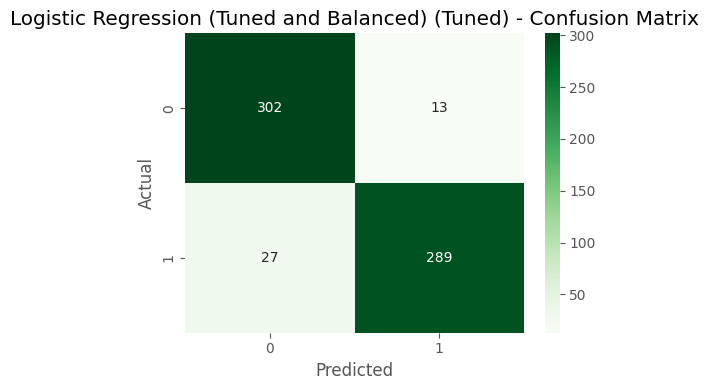

In [ ]:
# defining the hyper parameter grid

log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10],              # Regularization strength (lower = stronger regularization)
    'penalty': ['l2'],                    # L2 is most commonly used
    'solver': ['liblinear', 'lbfgs'], # Compatible solvers for L2
    'max_iter': [2000, 3000]
}

# Runing Model with the Tuning and Evaluation Function

results_log_reg_tuned = tune_and_evaluate_model(
    model_class=LogisticRegression(
        random_state=42,                 # For Reproducibility
        class_weight='balanced'          # Handle class imbalance by up-weighting the minority class
    ),
    param_grid=log_reg_param_grid,
    name="Logistic Regression (Tuned and Balanced)",
    X_train = X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    color='blue'
)

# Access the best tuned Logistic Regression model from the results dictionary
tuned_log_reg_model = results_log_reg_tuned['model']

**Logistic Regression Tuned**

**Pattern**
- The best Best Parameters: {'C': 10, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}
- This model has an accuracy score of 0.93
- For the fake new: it achieved percision of 0.92, recall of  0.96 and f1-score of 0.94
- For the real new: it achieved percision of 0.96, recall of 0.91 and f1-score of 0.94.

**Insight**
- The tuned Logistic Regression model achieved a high accuracy of approximately 93.66%.
- The model demonstrates balanced performance across both fake and real news classes, with identical F1-scores of 0.94. This indicates the tuning process, particularly with class_weight='balanced', helped in addressing potential class imbalance and ensuring the model performs well on both categories.
- Compared to the baseline Logistic Regression model (which had an accuracy of 0.919), the tuned version shows a slight improvement in overall accuracy and maintains strong, balanced performance for both classes.


##**XGB Classifer**


 Tuning & Evaluating: XGBoost (Tuned) with GridSearchCV (cv=5)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

 Evaluation of Tuned XGBoost (Tuned):
 Accuracy Score: 0.9175911251980983

 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       315
           1       0.93      0.90      0.92       316

    accuracy                           0.92       631
   macro avg       0.92      0.92      0.92       631
weighted avg       0.92      0.92      0.92       631



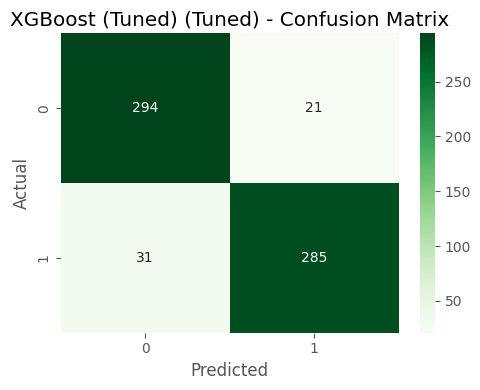

In [ ]:
# defining the parameters

xgb_class= XGBClassifier


xgb_param_grid = {
    'n_estimators': [100, 200],         # Number of boosting rounds
    'max_depth': [3,5],                # Maximum tree depth
    'learning_rate': [0.05, 0.1]        # Shrinks feature weights (lower = slower but more accurate)

}

# Handling Class Imbalance by Calculating Scale Weight
neg, pos = np.bincount(y_train)         # Count of each class in training target
scale = neg / pos                       # Ratio used to balance the positive class

# Run the Tuning and Evaluation Function

results_xgb_tuned = tune_and_evaluate_model(
    model_class=XGBClassifier(
        use_label_encoder=False,        # Disable deprecated label encoder
        eval_metric='logloss',          # Evaluation metric for binary classification
        random_state=42,                # For Reproducibility
        scale_pos_weight=scale          # to handle imbalances as defined and calculated above
    ),
    param_grid=xgb_param_grid,    # Hyperparameters to explore as defined above
    name="XGBoost (Tuned)",
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    color='orange'
)
# Access the best tuned Logistic Regression model from the results dictionary
tuned_xgb_model = results_xgb_tuned['model']

**XGBoost Classifier (Tuned)**

**Pattern**

- The Best Parameter is {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
- The tuned model shows a slightly lower accuracy score of 0.9176 compared to the baseline XGBoost model (0.9334).
- For the fake news (class 0), it achieved precision of 0.90, recall of 0.93, and an F1-score of 0.92.
- For the real news (class 1), it achieved precision of 0.93, recall of 0.90, and an F1-score of 0.92.

**Insight**
- The tuning process, while finding optimal parameters, did not lead to an improvement in performance for the XGBoost model on this dataset compared to the baseline model.
- The model still performs well in terms of balancing precision and recall for both classes, indicating it's not heavily biased towards one class.

**Recommendation**
- Based on the evaluation metrics, the baseline XGBoost model is recommended over the tuned version for this task as it achieved slightly better performance.
- Further exploration of a wider range of hyperparameters or different tuning strategies might potentially yield better results in the future.


####**Comparing the Tuned Model**

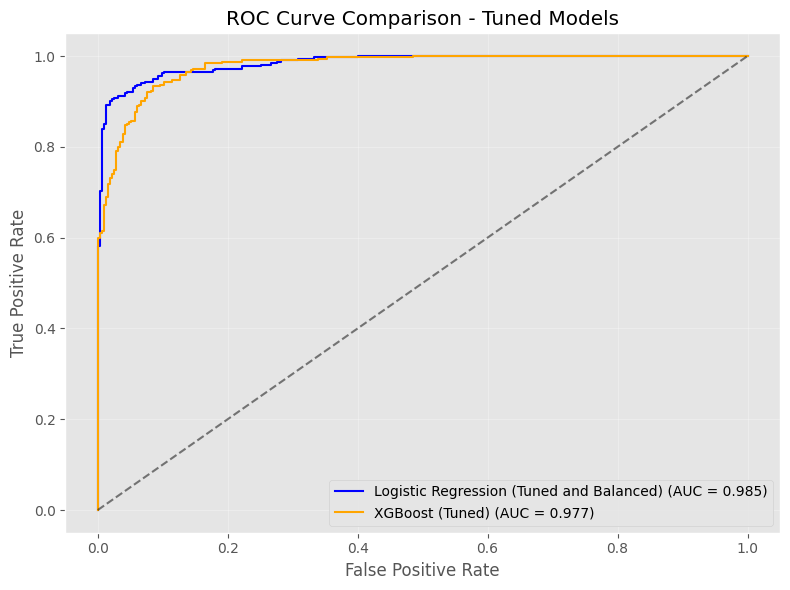

In [ ]:
#Checking the ROC-AUC
# Calculate ROC curve and AUC for each model

#For Logistics
fpr_log_re, tpr_log_re, _ = roc_curve(y_test, tuned_log_reg_model.predict_proba(X_test)[:, 1])
auc_log_re = auc(fpr_log_re, tpr_log_re)

#For XGB Classifier
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, tuned_xgb_model.predict_proba(X_test)[:, 1])
auc_xgb = auc(fpr_xgb, tpr_xgb)



# List of all result objects and their curve colors
models = [
    (results_log_reg_tuned, 'blue'),
    (results_xgb_tuned, 'orange')

]

# Plot each model's ROC curve
plt.figure(figsize=(8, 6))
for result, color in models:
    plt.plot(result['fpr'], result['tpr'],
             label=f"{result['name']} (AUC = {result['auc']:.3f})",
             color=color)

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

# Chart details
plt.title("ROC Curve Comparison - Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Comparing the Tuned Models**

**Insight**
- The Tuned Logistic Regression model demonstrated superior performance compared to the tuned XGBoost model, as evidenced by its higher ROC-AUC score of 0.985.
- The tuning process successfully improved the performance of the Logistic Regression model relative to its baseline.
- Conversely, the tuned XGBoost model showed a slight decrease in performance compared to its baseline version.

**Recommendation**

- Based on the comprehensive evaluation, the Tuned Logistic Regression model is identified as the best-performing model for this fake news detection task.
- For future work involving the XGBoost model, it is recommended to start with the baseline model's performance as a reference point and explore a broader range of hyperparameters or alternative tuning strategies to potentially achieve better results than the baseline.

In [ ]:
#Comparing the tuned model by prediction
#For XGB Classifier
xgb_y_pred= tuned_xgb_model.predict(X_test)
print(xgb_y_pred)

#For Logistics Regression
log_re_y_pred= tuned_log_reg_model.predict(X_test)
print(log_re_y_pred)

[1 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 1
 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1
 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1
 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1
 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1
 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 1
 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1
 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1
 0 0 1 1 1 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1
 1 1 1 1 1 1 1 0 0 0 1 0 

####**Saving the best Model**


In [ ]:
#Save the best model
#Logistics regression tuned is best
import joblib
joblib.dump(tuned_log_reg_model, 'tuned_log_reg_model')

['tuned_log_reg_model']

In [ ]:
# Create a DataFrame to display actual and predicted results
# Ensure the 'Actual' column is included and correctly joined with predictions

# Start with the 'Actual' column from the test set, decoded using the LabelEncoder
results = pd.DataFrame({"Actual": le.inverse_transform(y_test)})

# Add predictions from each model as new columns to the results DataFrame
# Make sure to use the correct variable names for the predictions from each model

# Baseline model predictions
results['LR Predictions'] = le.inverse_transform(y_pred)
results['SVC Predictions'] = le.inverse_transform(Svc_y_pred)
results['Decision Tree Predictions'] = le.inverse_transform(dec_tree_y_pred)
results['Random Forest Predictions'] = le.inverse_transform(rand_y_pred)
results['XGB Predictions'] = le.inverse_transform(xgb_y_pred)

# Tuned model predictions
# Ensure these variables exist from previous executions
results['Tuned LR Predictions'] = le.inverse_transform(tuned_log_reg_y_pred)
results['Tuned XGBoost Predictions'] = le.inverse_transform(tuned_xgb_y_pred)


# Display the complete results DataFrame
display(results)

,Actual,LR Predictions,SVC Predictions,Decision Tree Predictions,Random Forest Predictions,XGB Predictions,Tuned LR Predictions,Tuned XGBoost Predictions
0,real,real,fake,real,real,real,real,real
1,fake,fake,real,fake,real,fake,fake,fake
2,fake,fake,fake,fake,fake,fake,fake,fake
3,fake,fake,fake,fake,fake,fake,fake,fake
4,real,real,fake,real,real,fake,real,fake
...,...,...,...,...,...,...,...,...
626,fake,fake,real,fake,fake,fake,fake,fake
627,fake,fake,fake,fake,fake,fake,fake,fake
628,fake,fake,real,fake,fake,fake,fake,fake
629,fake,fake,fake,fake,fake,fake,fake,fake


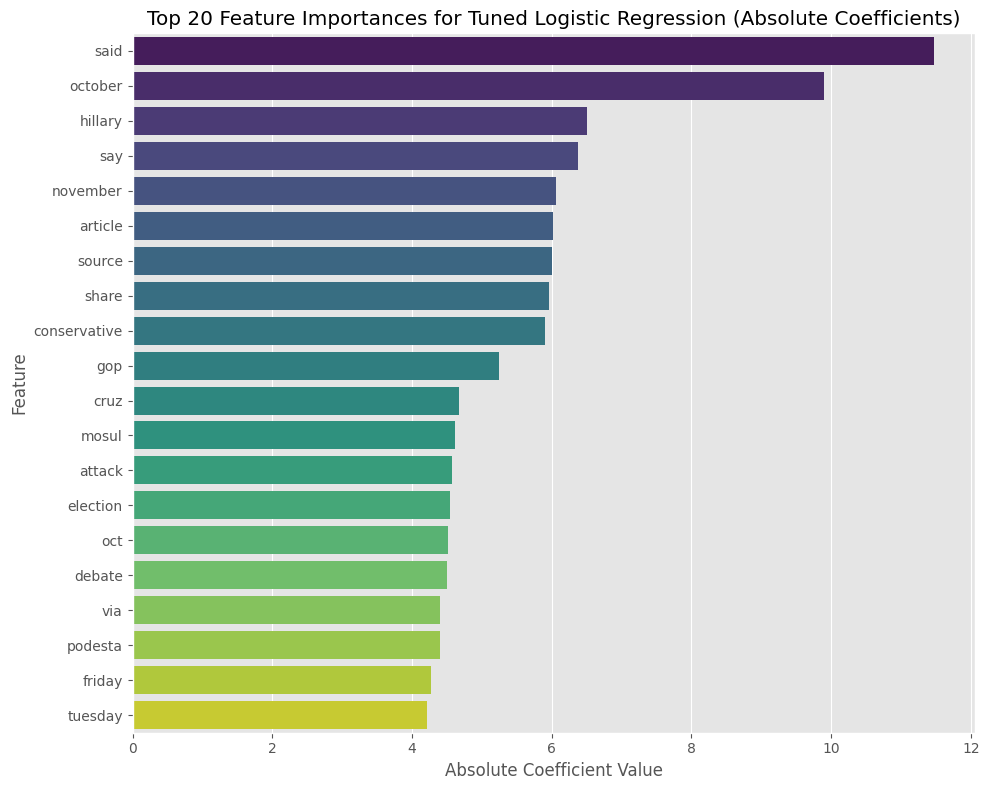

In [ ]:

# Recalculate feature importance for Tuned Logistic Regression (using coefficients)

# Get the coefficients
coefficients = tuned_log_reg_model.coef_[0]

# Since we combined TF-IDF features with other features, we need the feature names
# Get feature names from TF-IDF vectorizer
tfidf_feature_names = tfidf.get_feature_names_out()

# Create names for the other features
other_feature_names = ['word_count', 'sentiment']

# Combine all feature names
all_feature_names = list(tfidf_feature_names) + other_feature_names

# Create a pandas Series for easier analysis
feature_importance_lr = pd.Series(coefficients, index=all_feature_names)

# Sort by absolute value to see the most important features (positive or negative influence)
sorted_feature_importance_lr = feature_importance_lr.abs().sort_values(ascending=False)


# Get the top 20 features and their absolute coefficients
top_20_features_lr = sorted_feature_importance_lr.head(20)

# Create a bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_features_lr.values, y=top_20_features_lr.index, palette='viridis')
plt.title('Top 20 Feature Importances for Tuned Logistic Regression (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

##**Summary of Key Insights and Recommendations**

**Model Performance:**

- **Strengths:** The tuned Logistic Regression and XGBoost models demonstrated strong performance in classifying fake and real news, achieving high accuracy and balanced precision/recall/F1-scores (around 0.93-0.94). The high ROC-AUC scores (around 0.98) indicate their effectiveness in distinguishing between the two classes.
- **Weaknesses:** While the top models performed well, the SVC and Decision Tree models showed lower performance, highlighting the importance of choosing appropriate models for this task. The tuning process for XGBoost did not yield significant improvements over the baseline, suggesting that the chosen hyperparameter space or tuning strategy might need further exploration.

**Dataset Insights:**
- The dataset was relatively balanced between fake and real news after cleaning.
- Basic text features like word count and sentiment alone were not sufficient to clearly differentiate fake from real news.
- Text visualizations (WordClouds and Top 2-grams) revealed overlapping political subjects but distinct linguistic patterns and focus areas between fake and real news, indicating the value of textual analysis.
- The absence of metadata like URL domain and timestamps in the dataset limited the ability to incorporate these potentially valuable features.


**Improvements and Additional Features/Data Sources:**

- **Advanced Text Features:** Incorporating more sophisticated NLP techniques like word embeddings (e.g., BERT), topic modeling, and analysis of syntactic/stylistic features could capture deeper linguistic nuances.
- **Metadata:** If available, adding metadata such as source URL domain, publication time, author information, and external links could significantly enhance model performance by providing external context.


**Ethical Considerations**
- **Risk of False Positives/Negatives Sentiment:** Some real articles may be flagged as fake and vice versa. Any deployment should include manual review for high-stakes decisions.
- **Dataset Bias:** The dataset focuses on a particular region and time period, which may limit generalizability. Regular updates with diverse, global data are needed.
- **Transparency:** Users and stakeholders should be informed about how the model works, its limitations, and that it is not infallible.

**Conclusion**
Based on the comprehensive analysis and model development conducted in this notebook, we successfully built and evaluated several machine learning models for detecting fake news. The analysis revealed that linguistic patterns, in addition to basic text features, play a significant role in differentiating between real and fake news. Through hyperparameter tuning, the Tuned Logistic Regression model emerged as the best performer, demonstrating high accuracy and strong, balanced performance in classifying both fake and real news articles. This project provides a solid foundation for building effective misinformation detection systems, with clear avenues for future enhancement through incorporating additional features and exploring advanced modeling techniques.